**The Sparks Foundation** 

**Intern Name - Shraddha Kulkarni**

**Data Science and Business Analytics**

**Task 1:- Prediction Using Supervised ML**

**Problem Statement: Predict the percentage of an student based on the no. of study hours**

**Data Source: http://bit.ly/w-data**

**Importing the required Libraries**

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the data from the link**

In [44]:
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualising Dataset**

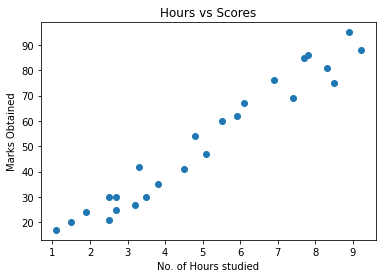

In [46]:
#Plotting the distribution of scores using scatterplot
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('No. of Hours studied')
plt.ylabel('Marks Obtained')
plt.show()

**There is a linear relationship between the No.of hours studied to the marks scored that is they are directly propotional. As the number of hours studied increases marks or the percentage increases.**



**Splitting the dataset into two variables x and y**

In [47]:
x=dataset.iloc[:, : -1].values
y=dataset.iloc[:, 1].values

In [48]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [49]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Splitting the Data into Training and Testing data**

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.3,random_state=0)

In [51]:
x_train

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [52]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [53]:
y_train

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

In [54]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

**Training the model**

**Linear Regression**

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
print("Training Done!")

Training Done!


In [58]:
lr.intercept_

2.3708153823418883

In [59]:
lr.coef_

array([9.78856669])

**Plotting the Regression Line**

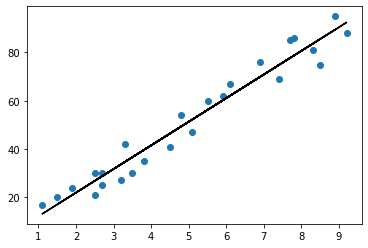

In [60]:
line = lr.intercept_+x*lr.coef_
plt.scatter(x,y)
plt.plot(x,line,color='Black')
plt.show()

**Predicting the values from test data**

In [61]:
y_pred_lr = lr.predict(x_test)

In [62]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [63]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [64]:
y_pred_lr

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

**Difference between Original score and Predicted score**

In [65]:
difference = y_test - y_pred_lr
a=pd.concat([pd.Series(y_test),pd.Series(y_pred_lr),pd.Series(difference)],axis=1)
a.columns=['Original Score','Predicted Score','Difference']
a

,Original Score,Predicted Score,Difference
0,20,17.053665,2.946335
1,27,33.694229,-6.694229
2,69,74.806209,-5.806209
3,30,26.842232,3.157768
4,62,60.123359,1.876641
5,35,39.567369,-4.567369
6,24,20.969092,3.030908
7,86,78.721636,7.278364


**Estimating the Training data Score and Testing data Score**

In [66]:
print("Training Data Score:",lr.score(x_train,y_train))
print("Testing Data Score:",lr.score(x_test,y_test))

Training Data Score: 0.9484997422695115
Testing Data Score: 0.9568211104435257


**Predicting Score if a student studies for 9.25hours/day**

In [67]:
hours=[[9.25]]
new_pred = lr.predict(hours)
print("Predicted Score if a student studies for 9.25 hours/day: {}".format(new_pred[0]))

Predicted Score if a student studies for 9.25 hours/day: 92.91505723477056


**Model Evaluation** 

In [68]:
from sklearn import metrics
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred_lr))

Mean Absolute Error:  22.965097212700428


In [70]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Root Mean Squared Error:  4.7921912746363144


In [71]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred_lr))

Mean Absolute Error:  4.419727808027651
